In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import matplotlib
import csv

In [29]:
df = pd.read_csv("mxmh_survey_results.csv")
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [30]:
df.shape

(736, 33)

In [31]:
df.dtypes

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,735.0,2.520680e+01,1.205497e+01,10.0,18.0,21.0,28.0,89.0
Hours per day,736.0,3.572758e+00,3.028199e+00,0.0,2.0,3.0,5.0,24.0
BPM,629.0,1.589948e+06,3.987261e+07,0.0,100.0,120.0,144.0,999999999.0
Anxiety,736.0,5.837636e+00,2.793054e+00,0.0,4.0,6.0,8.0,10.0
Depression,736.0,4.796196e+00,3.028870e+00,0.0,2.0,5.0,7.0,10.0
Insomnia,736.0,3.738451e+00,3.088689e+00,0.0,1.0,3.0,6.0,10.0
OCD,736.0,2.637228e+00,2.842017e+00,0.0,0.0,2.0,5.0,10.0


In [33]:
df.describe(exclude='number').T

,count,unique,top,freq
Timestamp,736,735,8/28/2022 16:15:08,2
Primary streaming service,735,6,Spotify,458
While working,733,2,Yes,579
Instrumentalist,732,2,No,497
Composer,735,2,No,609
Fav genre,736,16,Rock,188
Exploratory,736,2,Yes,525
Foreign languages,732,2,Yes,404
Frequency [Classical],736,4,Rarely,259
Frequency [Country],736,4,Never,343


In [34]:
missing_values = df.isnull().sum()
print(missing_values)

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [35]:
df_filled = df.dropna()
df_filled.to_csv('mxmh_survey_results_filled.csv', index=False)

In [36]:
# Read the cleaned data
df = pd.read_csv('mxmh_survey_results_filled.csv')

# Define a function for outlier handling
def handle_outliers(column):
    # Calculate the maximum and IQR for the column
    column_max = df[column].max()
    column_iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    
    # Define the outlier range
    upper_threshold = df[column].quantile(0.75) + 1.5 * column_iqr
    lower_threshold = df[column].quantile(0.25) - 1.5 * column_iqr
    
    # Mark rows that are outside the outlier range
    df[column + '_Outlier'] = (df[column] > upper_threshold) | (df[column] < lower_threshold)

# List of columns to handle outliers
columns = ['Hours per day', 'BPM']

# Handle outliers for each column using the function
for column in columns:
    handle_outliers(column)

# Remove rows containing outliers
outlier_flag_columns = [column + '_Outlier' for column in columns]
df_cleaned = df[~df[outlier_flag_columns].any(axis=1)]

# Overwrite the original data with the cleaned data
df_cleaned.to_csv('mxmh_survey_results_filled.csv', index=False)

In [37]:
df = pd.read_csv('mxmh_survey_results_filled.csv')

# Drop the 'Timestamp' and 'Permissions' columns
df_cleaned = df.drop(['Timestamp', 'Permissions','Hours per day_Outlier','BPM_Outlier'], axis=1)

# Save the cleaned data to the same CSV file
df_cleaned.to_csv('mxmh_survey_results_filled.csv', index=False)

In [38]:
import csv

mapping = {
    'Never': 1,
    'Rarely': 2,
    'Sometimes': 3,
    'Very frequently': 4
}

# Open the CSV file and perform data transformation
with open('mxmh_survey_results_filled.csv', 'r', newline='') as file:
    reader = csv.reader(file)
    rows = list(reader)

    # Find the column indices of 'Frequency'
    header = rows[0]
    frequency_indices = [i for i, col in enumerate(header) if 'Frequency' in col]

    # Iterate through each row for conversion
    for i in range(1, len(rows)):
        for j in frequency_indices:
            rows[i][j] = mapping.get(rows[i][j], rows[i][j])

# Write the modified data back to the CSV file
with open('mxmh_survey_results_filled.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

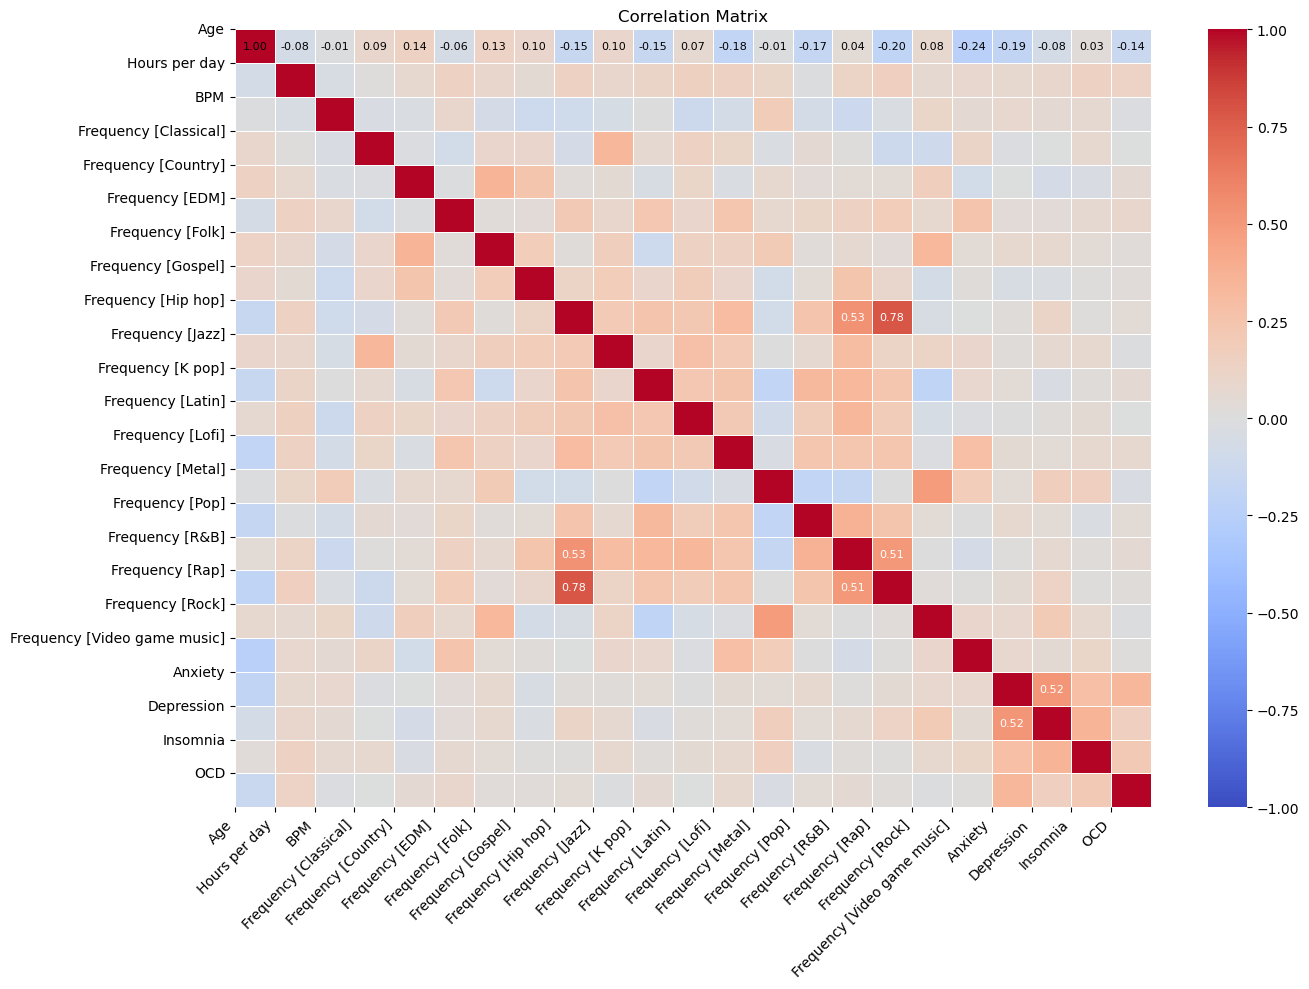

In [52]:
data = pd.read_csv('mxmh_survey_results_filled.csv')

# Select numerical columns
numeric_columns = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1,
            annot_kws={"fontsize": 8, "color": "black"})

# Annotate the correlation coefficients
for i in range(len(correlation_matrix.index)):
    for j in range(len(correlation_matrix.columns)):
        coefficient = correlation_matrix.iloc[i, j]
        if abs(coefficient) > 0.5 and i != j:
            plt.text(j + 0.5, i + 0.5, f'{coefficient:.2f}', ha='center', va='center',
                     color='white', fontsize=8)
        elif -1 <= coefficient < -0.5 and i != j:
            plt.text(j + 0.5, i + 0.5, f'{coefficient:.2f}', ha='center', va='center',
                     color='white', fontsize=8)

# Adjust the x-axis and y-axis ticks
plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(ticks=range(len(correlation_matrix.index)), labels=correlation_matrix.index, rotation=0)

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

/Users/candicechen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/candicechen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


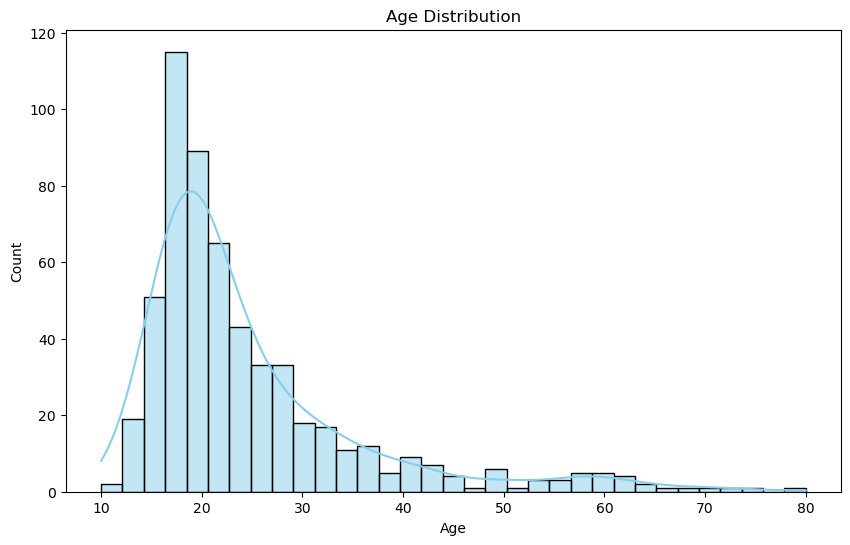

In [40]:
# Create the age distribution histogram with kernel density plot
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

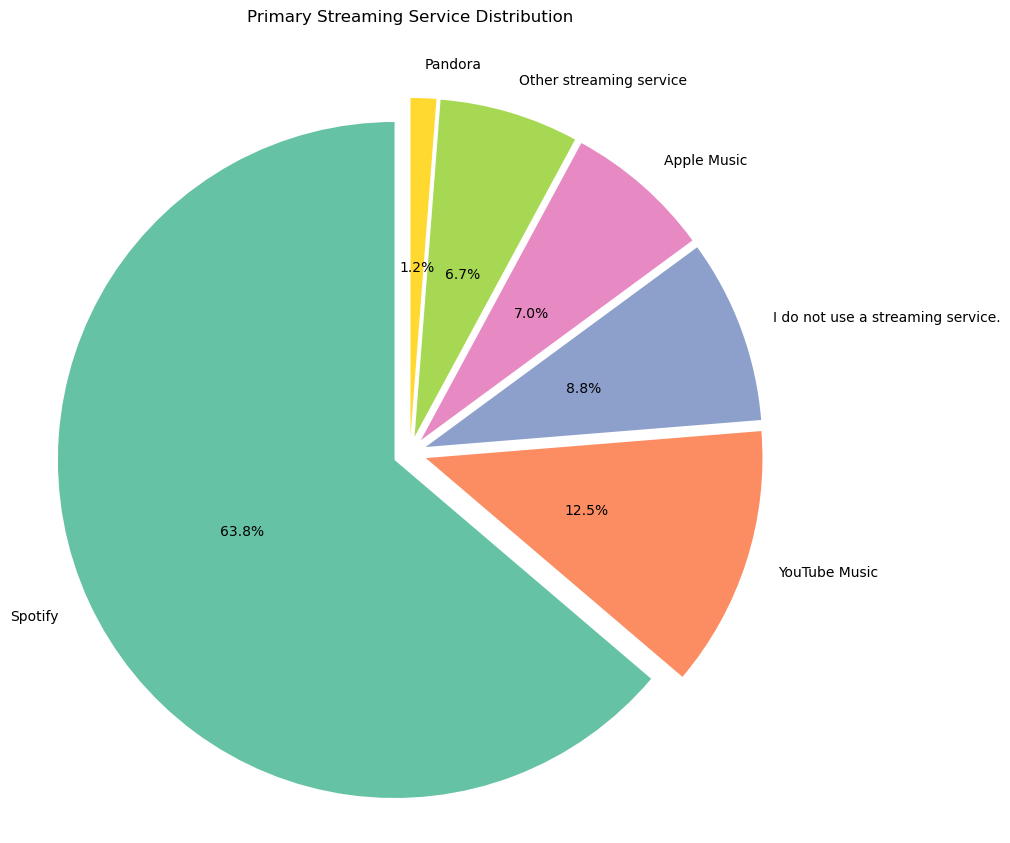

In [42]:
# Calculate the proportions of each Primary streaming service
service_counts = data['Primary streaming service'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 10))  # Increase the figure size
colors = sns.color_palette("Set2")
labels = service_counts.index

# Calculate the percentage and explode values for labeling and separating slices
percentages = [f'{val/sum(service_counts)*100:.1f}%' for val in service_counts]
explode = [0.05] * len(service_counts)  # Separating slices by a small amount

# Plot the pie chart with labels outside the pie and connecting lines
patches, texts, autotexts = plt.pie(service_counts, colors=colors, labels=labels, autopct='%1.1f%%',
                                    startangle=90, pctdistance=0.5, explode=explode)

plt.axis('equal')
plt.title('Primary Streaming Service Distribution', pad=30)  # Adjust title position
plt.show()

/Users/candicechen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/candicechen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/candicechen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


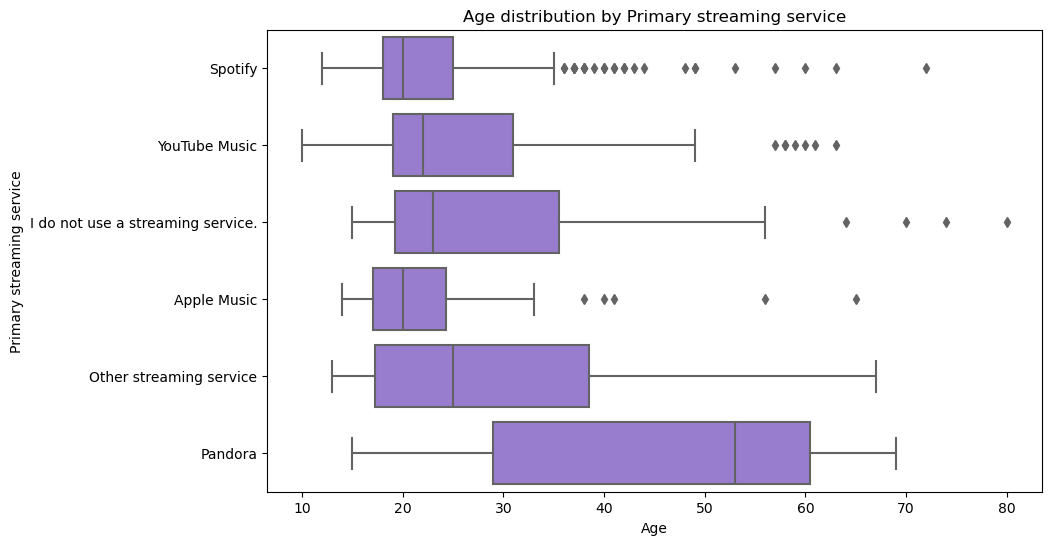

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Age', y='Primary streaming service', color='mediumpurple')
plt.xlabel('Age')
plt.ylabel('Primary streaming service')
plt.title('Age distribution by Primary streaming service')
plt.show()

/Users/candicechen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/candicechen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


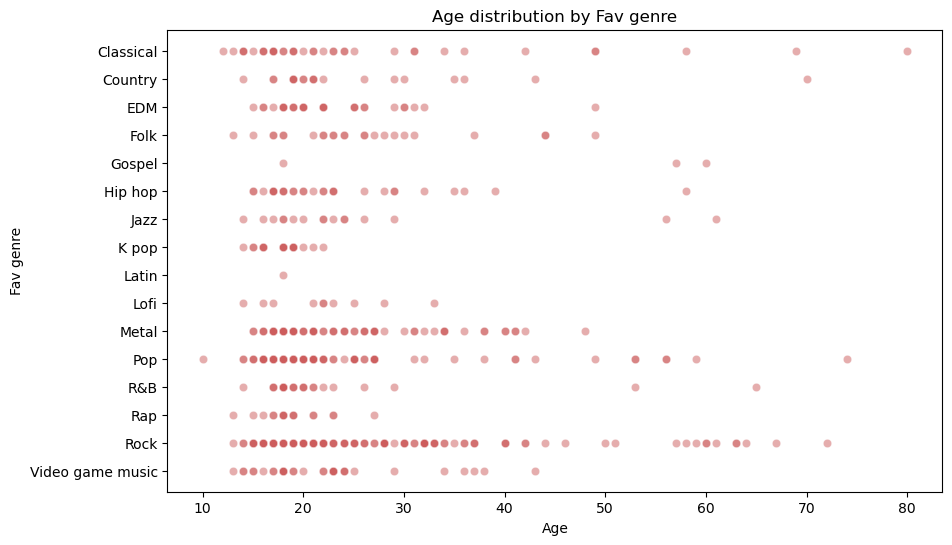

In [43]:
# Define the order for the y-axis
genre_order = sorted(data['Fav genre'].unique())

# Convert 'Fav genre' to categorical data with specified order
data['Fav genre'] = pd.Categorical(data['Fav genre'], categories=genre_order, ordered=True)

# Create the scatter plot of age and Fav genre
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Fav genre', alpha=0.5, marker='o', color='indianred')
plt.xlabel('Age')
plt.ylabel('Fav genre')
plt.title('Age distribution by Fav genre')
plt.show()

/Users/candicechen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/candicechen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


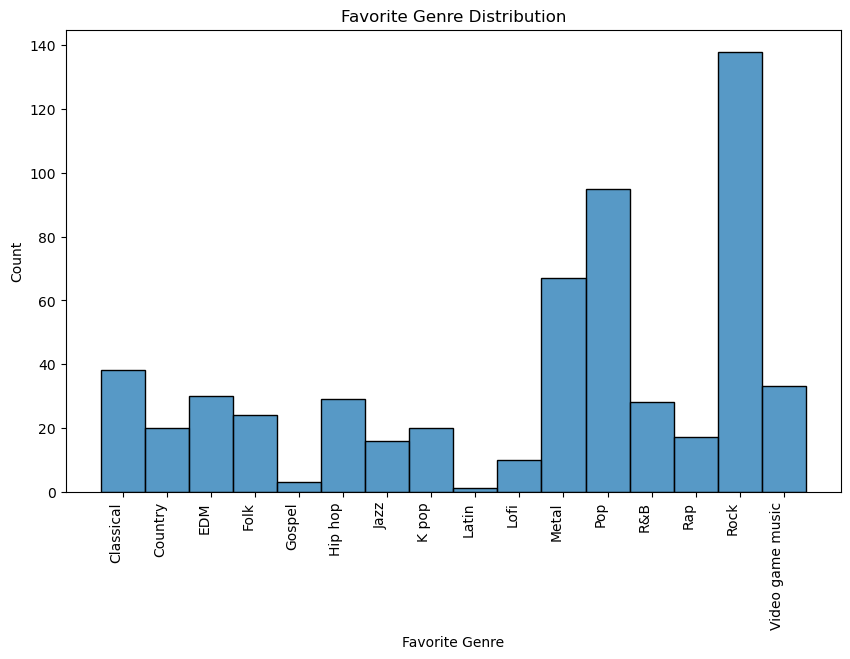

In [74]:
# Define the order for the x-axis
genre_order = sorted(data['Fav genre'].unique())

# Convert 'Fav genre' to categorical data with specified order
data['Fav genre'] = pd.Categorical(data['Fav genre'], categories=genre_order, ordered=True)

# Create the genre distribution histogram 
plt.figure(figsize=(10, 6))

sns.histplot(data=data, x='Fav genre')
plt.xlabel('Favorite Genre')
plt.ylabel('Count')
plt.title('Favorite Genre Distribution')
plt.xticks(rotation=90, ha='right')  # Rotate and align x-axis labels

plt.show()

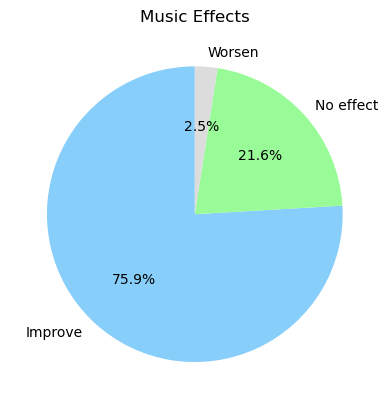

In [67]:
music_effects_counts = df['Music effects'].value_counts()

# Set the color
labels = music_effects_counts.index
colors = ['#87CEFA', '#98FB98', '#DCDCDC']

plt.pie(music_effects_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Music Effects')
plt.show()

<Figure size 1000x600 with 0 Axes>

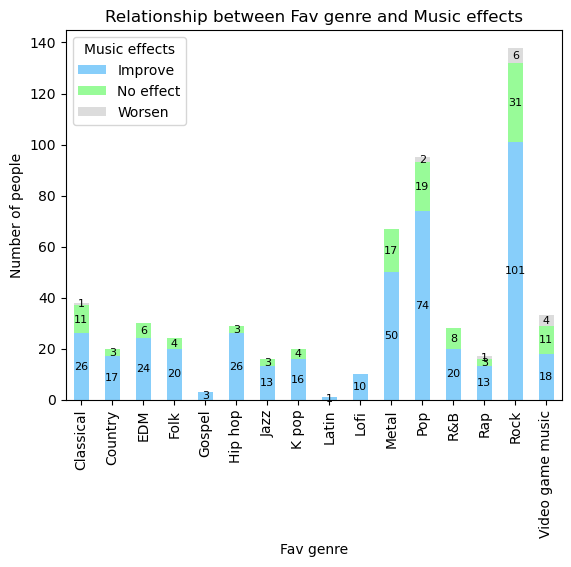

In [70]:
plt.figure(figsize=(10, 6))

# Create a stacked bar chart
grouped_data.plot(kind='bar', stacked=True, color=colors)

# Add labels to each segment of the stacked bar
for i, genre in enumerate(grouped_data.index):
    total = 0
    for j, effect in enumerate(grouped_data.columns):
        count = grouped_data.loc[genre, effect]
        if count != 0:
            plt.text(i, total + count / 2, str(count), ha='center', va='center', fontsize=8)
        total += count

# Set the chart title and axis labels
plt.title('Relationship between Fav genre and Music effects')
plt.xlabel('Fav genre')
plt.ylabel('Number of people')

# Display the chart
plt.show()

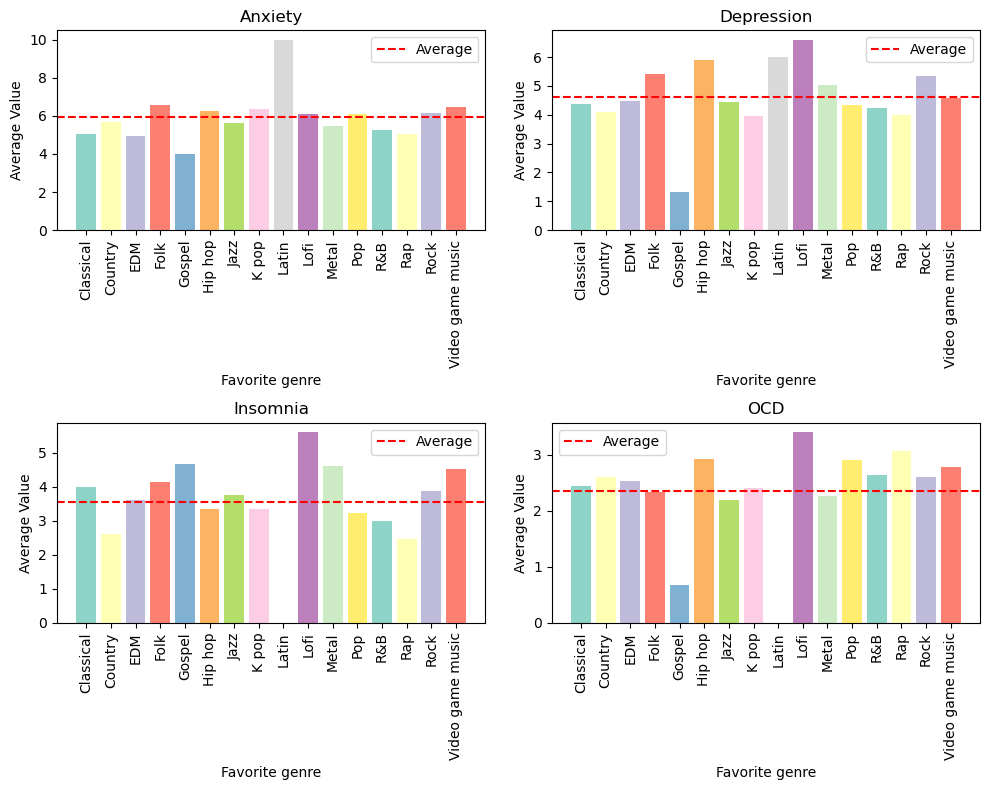

In [75]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('mxmh_survey_results_filled.csv')

# Compute the average values for each mental health condition
anxiety_mean = df.groupby("Fav genre")["Anxiety"].mean()
depression_mean = df.groupby("Fav genre")["Depression"].mean()
insomnia_mean = df.groupby("Fav genre")["Insomnia"].mean()
ocd_mean = df.groupby("Fav genre")["OCD"].mean()

# Sort the genres alphabetically
sorted_genres = sorted(df["Fav genre"].unique())

# Set the color palette
colors = sns.color_palette(palette="Set3")

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot the first bar chart (Anxiety) and add reference line for average value
axes[0, 0].bar(sorted_genres, anxiety_mean[sorted_genres], color=colors)
axes[0, 0].axhline(y=anxiety_mean.mean(), color='red', linestyle='--', label='Average')
axes[0, 0].set_title("Anxiety")
axes[0, 0].set_xlabel("Favorite genre")
axes[0, 0].set_ylabel("Average Value")
axes[0, 0].tick_params(axis="x", rotation=90)
axes[0, 0].legend()

# Plot the second bar chart (Depression) and add reference line for average value
axes[0, 1].bar(sorted_genres, depression_mean[sorted_genres], color=colors)
axes[0, 1].axhline(y=depression_mean.mean(), color='red', linestyle='--', label='Average')
axes[0, 1].set_title("Depression")
axes[0, 1].set_xlabel("Favorite genre")
axes[0, 1].set_ylabel("Average Value")
axes[0, 1].tick_params(axis="x", rotation=90)
axes[0, 1].legend()

# Plot the third bar chart (Insomnia) and add reference line for average value
axes[1, 0].bar(sorted_genres, insomnia_mean[sorted_genres], color=colors)
axes[1, 0].axhline(y=insomnia_mean.mean(), color='red', linestyle='--', label='Average')
axes[1, 0].set_title("Insomnia")
axes[1, 0].set_xlabel("Favorite genre")
axes[1, 0].set_ylabel("Average Value")
axes[1, 0].tick_params(axis="x", rotation=90)
axes[1, 0].legend()

# Plot the fourth bar chart (OCD) and add reference line for average value
axes[1, 1].bar(sorted_genres, ocd_mean[sorted_genres], color=colors)
axes[1, 1].axhline(y=ocd_mean.mean(), color='red', linestyle='--', label='Average')
axes[1, 1].set_title("OCD")
axes[1, 1].set_xlabel("Favorite genre")
axes[1, 1].set_ylabel("Average Value")
axes[1, 1].tick_params(axis="x", rotation=90)
axes[1, 1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

/Users/candicechen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/candicechen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/candicechen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


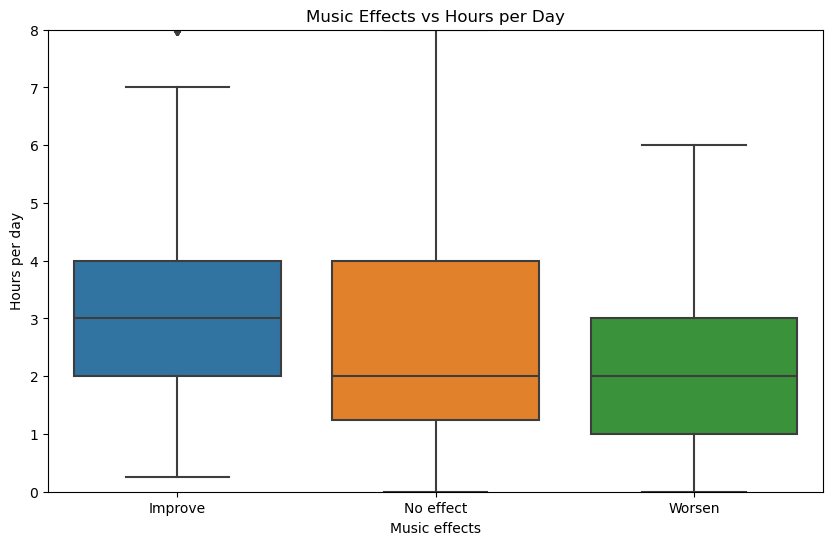

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.sort_values("Music effects"), x="Music effects", y="Hours per day")
plt.title('Music Effects vs Hours per Day')
plt.xlabel('Music effects')
plt.ylabel('Hours per day')
plt.ylim(0, 8)
plt.show()

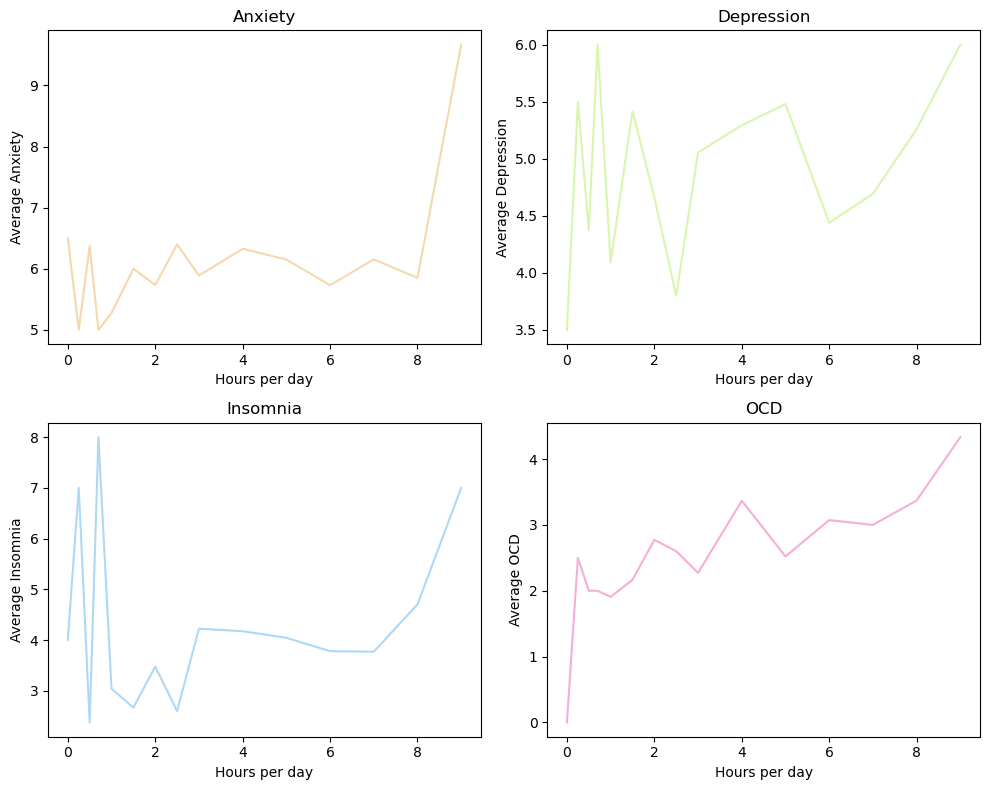

In [49]:

# Set the color palette
colors = ["#F6D8AE", "#D8F6AE", "#AED8F6", "#F6AED8"]

# Compute the average values for each mental health condition
anxiety_mean = df.groupby("Hours per day")["Anxiety"].mean()
depression_mean = df.groupby("Hours per day")["Depression"].mean()
insomnia_mean = df.groupby("Hours per day")["Insomnia"].mean()
ocd_mean = df.groupby("Hours per day")["OCD"].mean()

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Generate line plots for each mental health condition
axes[0, 0].plot(anxiety_mean.index, anxiety_mean.values, color=colors[0])
axes[0, 0].set_title("Anxiety")
axes[0, 0].set_xlabel("Hours per day")
axes[0, 0].set_ylabel("Average Anxiety")

axes[0, 1].plot(depression_mean.index, depression_mean.values, color=colors[1])
axes[0, 1].set_title("Depression")
axes[0, 1].set_xlabel("Hours per day")
axes[0, 1].set_ylabel("Average Depression")

axes[1, 0].plot(insomnia_mean.index, insomnia_mean.values, color=colors[2])
axes[1, 0].set_title("Insomnia")
axes[1, 0].set_xlabel("Hours per day")
axes[1, 0].set_ylabel("Average Insomnia")

axes[1, 1].plot(ocd_mean.index, ocd_mean.values, color=colors[3])
axes[1, 1].set_title("OCD")
axes[1, 1].set_xlabel("Hours per day")
axes[1, 1].set_ylabel("Average OCD")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

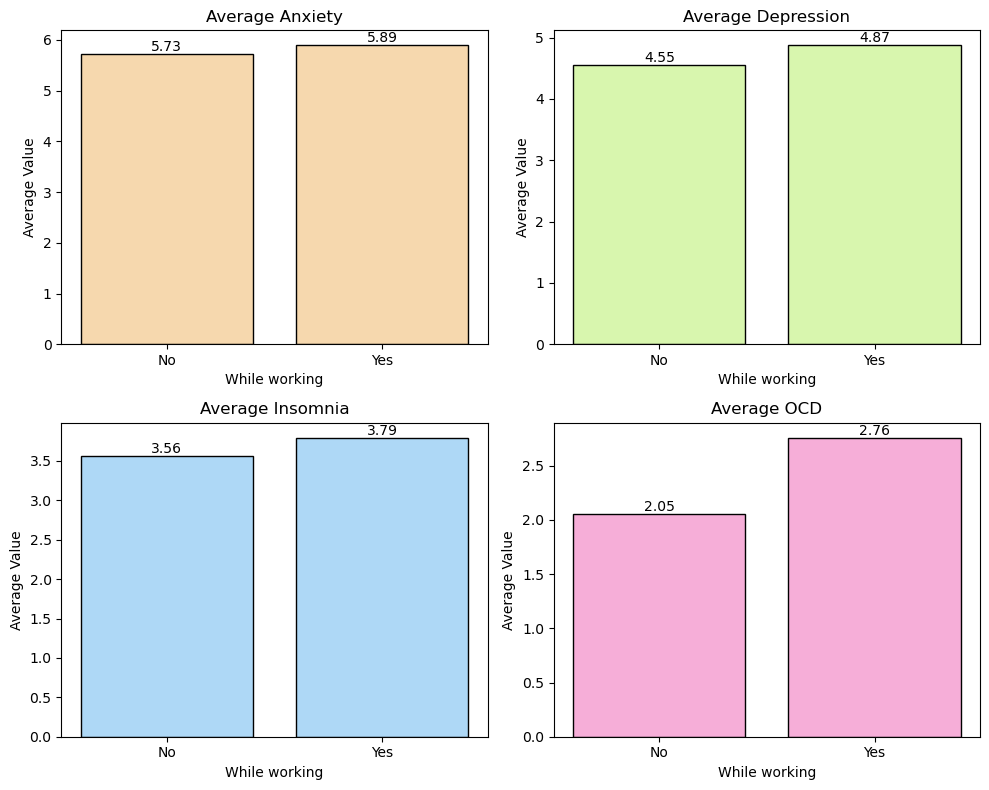

In [50]:
# Calculate the average values of the diseases based on "While working"
avg_anxiety = data.groupby("While working")["Anxiety"].mean()
avg_depression = data.groupby("While working")["Depression"].mean()
avg_insomnia = data.groupby("While working")["Insomnia"].mean()
avg_ocd = data.groupby("While working")["OCD"].mean()

# Set the color palette
colors = ["#F6D8AE", "#D8F6AE", "#AED8F6", "#F6AED8"]

# Create the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot the first subplot (Anxiety)
axes[0, 0].bar(avg_anxiety.index, avg_anxiety, color=colors[0], edgecolor='black')
axes[0, 0].set_title("Average Anxiety")
axes[0, 0].set_xlabel("While working")
axes[0, 0].set_ylabel("Average Value")
for i, v in enumerate(avg_anxiety):
    axes[0, 0].text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Plot the second subplot (Depression)
axes[0, 1].bar(avg_depression.index, avg_depression, color=colors[1], edgecolor='black')
axes[0, 1].set_title("Average Depression")
axes[0, 1].set_xlabel("While working")
axes[0, 1].set_ylabel("Average Value")
for i, v in enumerate(avg_depression):
    axes[0, 1].text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Plot the third subplot (Insomnia)
axes[1, 0].bar(avg_insomnia.index, avg_insomnia, color=colors[2], edgecolor='black')
axes[1, 0].set_title("Average Insomnia")
axes[1, 0].set_xlabel("While working")
axes[1, 0].set_ylabel("Average Value")
for i, v in enumerate(avg_insomnia):
    axes[1, 0].text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Plot the fourth subplot (OCD)
axes[1, 1].bar(avg_ocd.index, avg_ocd, color=colors[3], edgecolor='black')
axes[1, 1].set_title("Average OCD")
axes[1, 1].set_xlabel("While working")
axes[1, 1].set_ylabel("Average Value")
for i, v in enumerate(avg_ocd):
    axes[1, 1].text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Adjust the layout and spacing
plt.tight_layout()

# Display the plots
plt.show()